In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import os
import gc
import scipy.stats
import pdb
from tqdm import tqdm
# experiment = 'results/experiment_sklearn-*.csv'
# experiment = 'results/experiment_sklearn-benchmark5-data-mock_experiment_recs-random-average-knn_ninit-100-1000-10000_nrecs-1-5-10_iters-1000_ntrials-1000.csv'
# iters = 1000
#experiment = 'results/experiment_hibachi'+'_*iters-'+str(iters)+'*csv'

# experiment = 'results/experiment_hibachi*ninit-'+str(ninit)+'_*nrecs-'+str(nrecs)+'_*iters-'+str(iters)+'*csv'
# resdir = 'results_add'
resdir = 'results_pmlb2_r2'
# knowledge_base='sklearn'
knowledge_base='pmlb_sklearn*iters-1000_*'
# knowledge_base='hibachi'
frames = []
# from tqdm import tqdm
experiment = (resdir +'/summary/experiment_'+knowledge_base+'*summary.csv')
savename = experiment.split('/')[-1].replace('*','_all_').split('.csv')[0]
for i,f in tqdm(enumerate(glob(experiment))):
    df = pd.read_csv(f)
    # store dataframe of mean, median, 
    frames.append(df)
df_exp = pd.concat(frames)
print('columns:',df_exp.columns)
print('loaded',len(df_exp),'experiments')

/home/bill/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
9it [00:00, 97.44it/s]

columns: Index(['iteration', 'recommender', 'delta_bal_accuracy_mean',
       'delta_bal_accuracy_median', 'delta_bal_accuracy_std',
       'delta_bal_accuracy_min', 'delta_bal_accuracy_se',
       'delta_bal_accuracy_q1', 'delta_bal_accuracy_q3', 'iters', 'n_recs',
       'n_init'],
      dtype='object')
loaded 72000 experiments


In [2]:
# general settings for figures

markers = ['s','1','x','^','2','o','v','3','p','<','4','>']
space=50

nice_rec = {'knn':'KNN-meta',
            'knnmeta':'KNN-meta',
            'knnbasic':'KNNbasic',
            'knndataset':'KNN-data',
            'knnml':'KNN-ml',
            'knnmeans':'KNN-means',
            'slopeone':'SlopeOne',
            'random':'Random',
            'average':'Average',
            'svd':'SVD',
            'cocluster':'CoClustering',
            'best':'Best'
}
savedir = '/media/bill/Drive/projects/pennai/paper/figs/'

# balanced accuracy deltas for all predictions

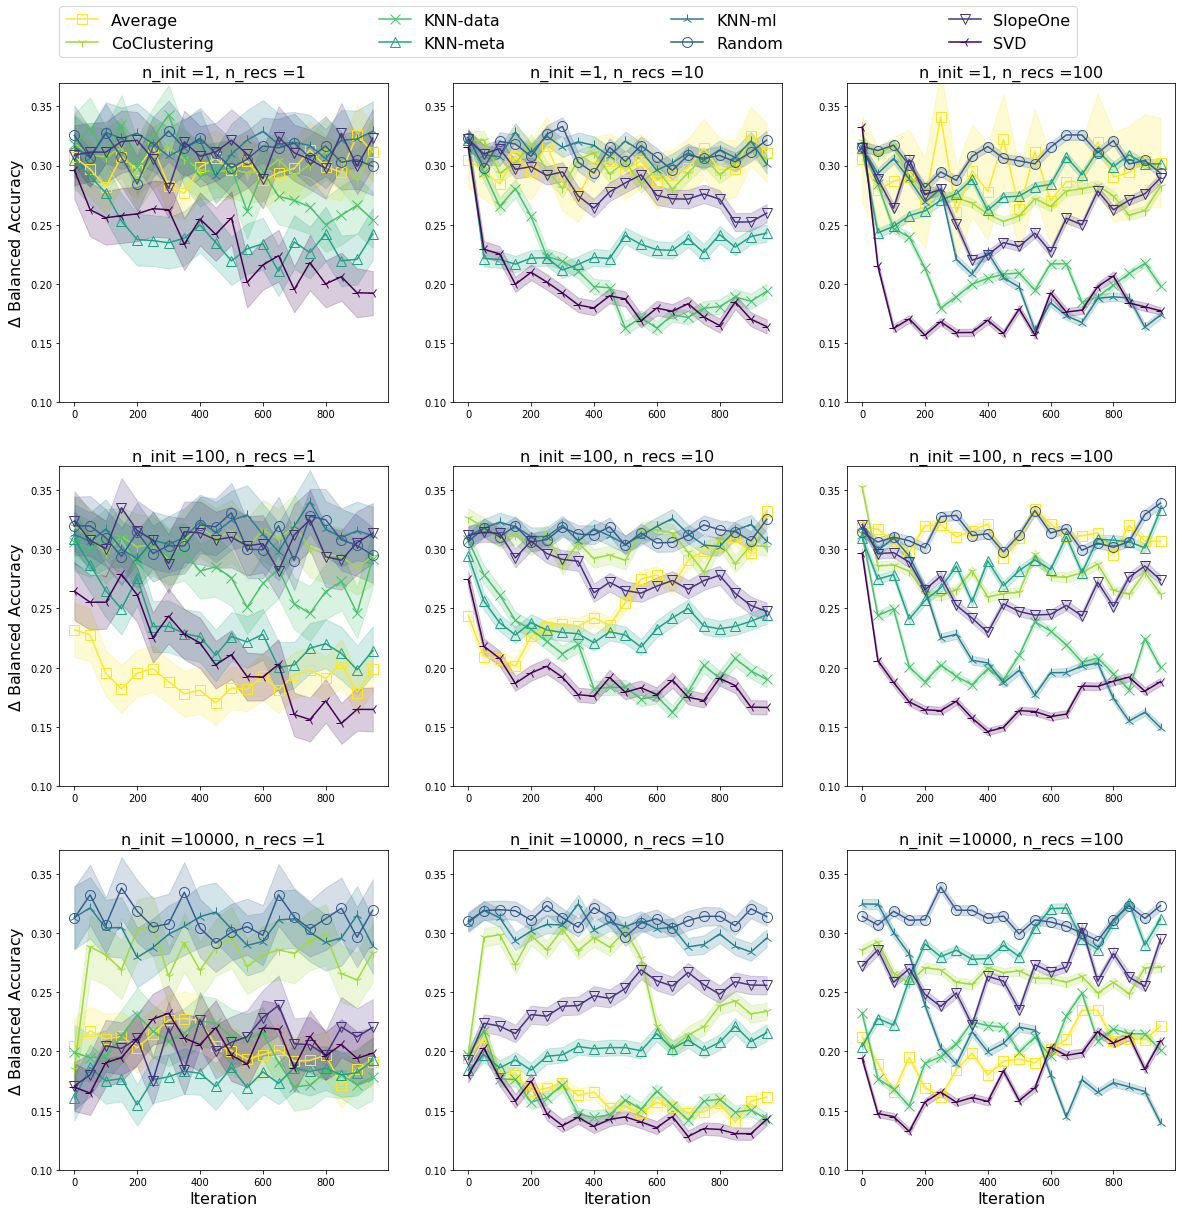

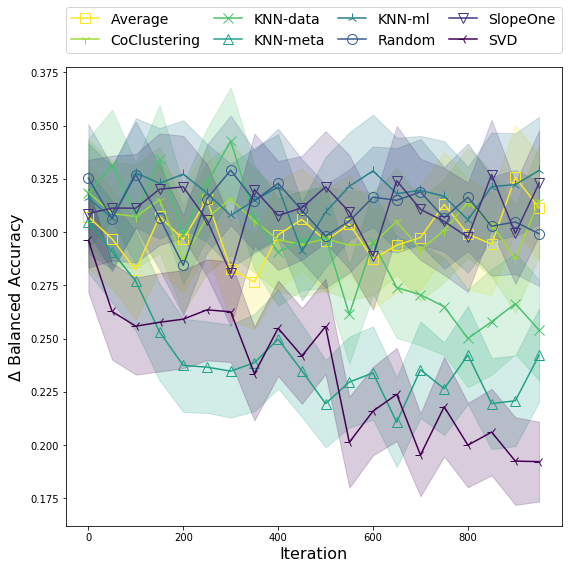

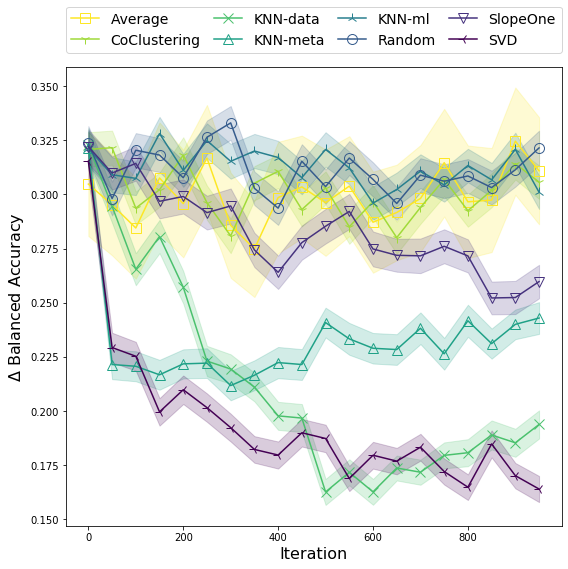

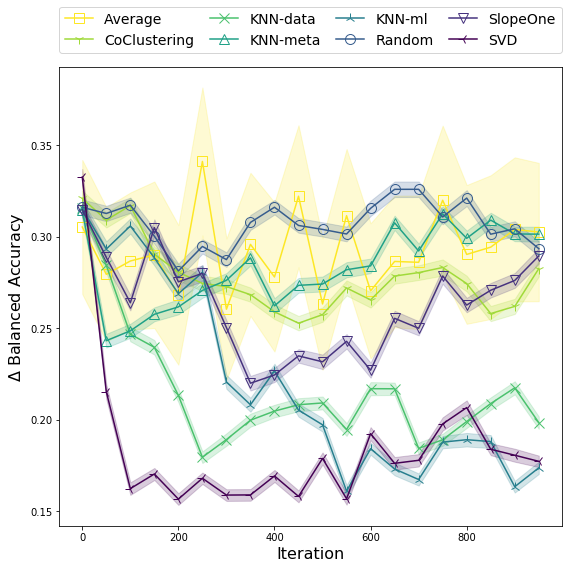

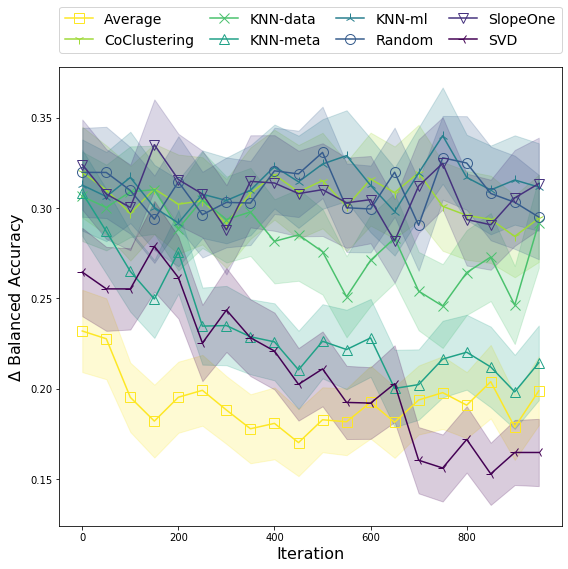

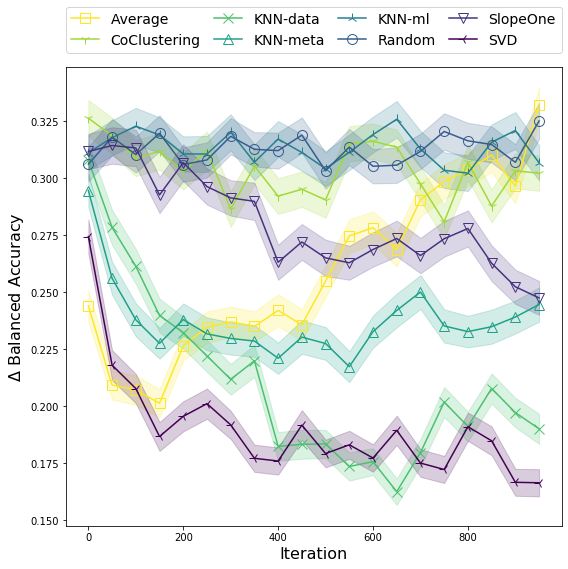

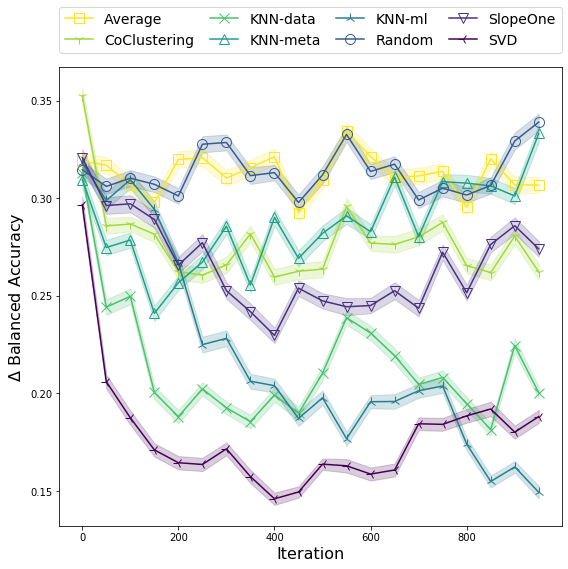

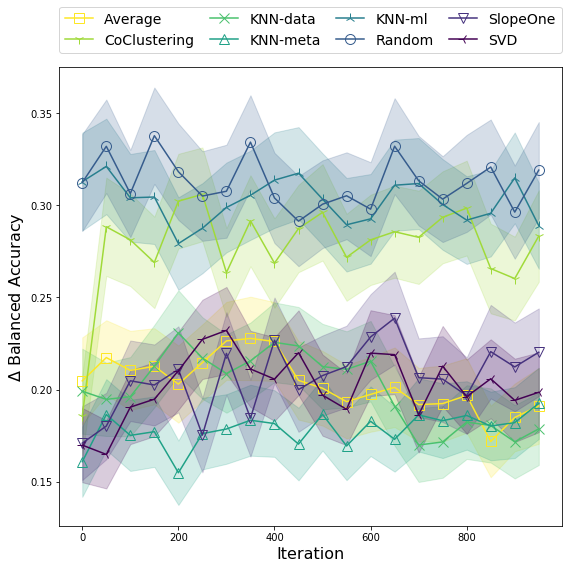

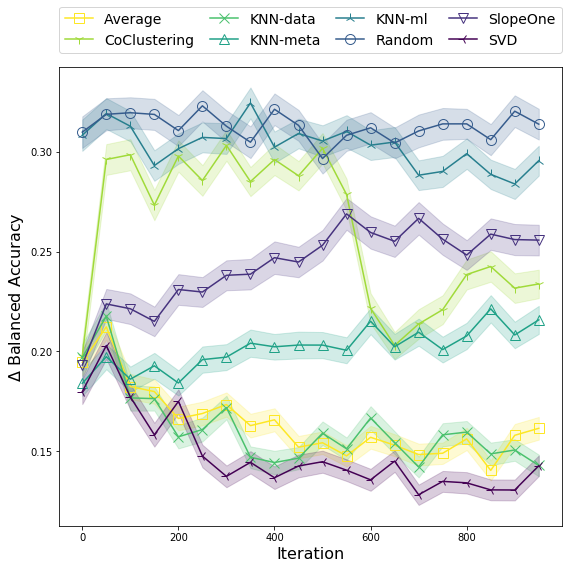

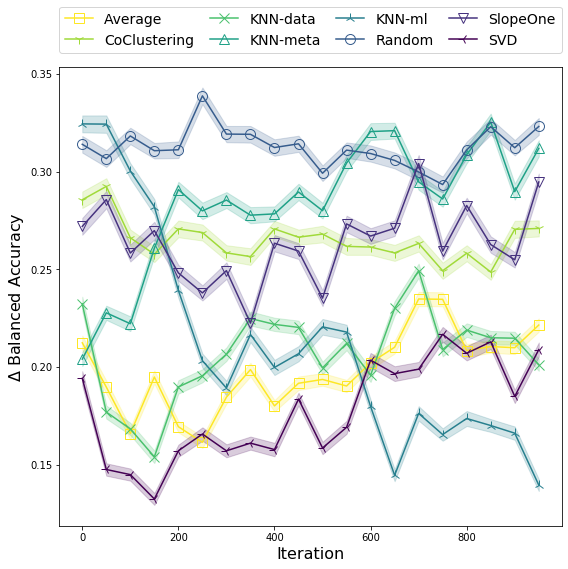

In [3]:
sns.set_palette('colorblind',3)
recs_count = len(df_exp.n_recs.unique())
init_count = len(df_exp.n_init.unique())
import numpy as np
iters=100
# for winner,dfg in df_exp.groupby('winner'):
hall = plt.figure(figsize=(20,20))
# h.suptitle(winner+' spike')
recs_count = len(df_exp.recommender.unique())
nrecs_count = len(df_exp.n_recs.unique())
init_count = len(df_exp.n_init.unique())
cmap = plt.cm.viridis(np.linspace(0,1,recs_count))[::-1]
rec_d = {}
for i,rec in enumerate(df_exp.recommender.unique()):
    rec_d[rec] = i
# markers = ['-','.-',':','--']
# for nrecs,dfr in dfg.groupby('n_recs'):
sub = 1
dfs = df_exp[~df_exp.recommender.isin(['knnbasic','knnmeans'])]
stat = 'mean' 
# stat = 'median' 
# dfs = df_exp
if not os.path.exists(savedir+'/figs/'): 
    os.mkdir(savedir+'/figs/')
    
for ninit,dfr in dfs.groupby('n_init'):
    for nrecs,dfi in dfr.groupby('n_recs'):
#         axall = hall.add_subplot(nrecs_count, init_count, sub)
        axall = hall.add_subplot(init_count, nrecs_count, sub)
        h = plt.figure(figsize=(8,8))
        ax = plt.gca()
        
#         for rec,dfrg in dfi.groupby('recommender'):
#         for rec in ['random','average','knn','svd']:
        for rec in dfi.recommender.unique():
            dfrg = dfi.loc[dfi.recommender==rec]
#             ####
#             # plot single figs
#             ##
            plt.sca(ax)
#             plt.errorbar(
#                 x=np.arange(len(dfrg['delta_bal_accuracy_'+stat])),
#                 y=dfrg['delta_bal_accuracy_'+stat],
# #                 yerr=dfrg['delta_bal_accuracy_se']*1.96,# 2.58, # 99% confidence interval
#                 yerr=0,
#                 fmt=markers[rec_d[rec]],
#                 errorevery=space,
#                 markevery=space,
#                 markerfacecolor='none',
#                 markersize=10,
#                 capsize=3,
#                 label=nice_rec[rec], 
#                 color = cmap[rec_d[rec]]
#             )
            plt.plot(
                np.arange(len(dfrg['delta_bal_accuracy_'+stat]))[::space],
                dfrg['delta_bal_accuracy_'+stat][::space],
#                 label='_nolegend', 
                label=nice_rec[rec], 
                marker=markers[rec_d[rec]],
                markerfacecolor='none',
                markersize=10,
                color = cmap[rec_d[rec]]
            )
            plt.fill_between(
                np.arange(len(dfrg['delta_bal_accuracy_'+stat]))[::space],
                dfrg['delta_bal_accuracy_'+stat][::space]-dfrg['delta_bal_accuracy_se'][::space]*1.96,
                dfrg['delta_bal_accuracy_'+stat][::space]+dfrg['delta_bal_accuracy_se'][::space]*1.96,
                color = cmap[rec_d[rec]],
                alpha=0.2,
                label='_nolegend'
            )
            #####
            # plot subplot figs
            ###
            plt.sca(axall)
#             plt.errorbar(x=np.arange(len(dfrg['delta_bal_accuracy_'+stat])),
#                          y=dfrg['delta_bal_accuracy_'+stat],
# #                          yerr=dfrg['delta_bal_accuracy_se']*1.96,# 2.58, # 99% confidence interval
#                          yerr=0,
#                          fmt=markers[rec_d[rec]],
#                          errorevery=space,
#                          markevery=space,
#                          markerfacecolor='none',
#                          markersize=10,
#                          capsize=1,
#                          label=nice_rec[rec], 
#                          color = cmap[rec_d[rec]]
# )
            plt.plot(np.arange(len(dfrg['delta_bal_accuracy_'+stat]))[::space],
                     dfrg['delta_bal_accuracy_'+stat][::space],
                     label=nice_rec[rec], 
                     marker=markers[rec_d[rec]],
                     markerfacecolor='none',
                     markersize=10,
                     color = cmap[rec_d[rec]]
                    )
            plt.fill_between(
                np.arange(len(dfrg['delta_bal_accuracy_'+stat]))[::space],
                dfrg['delta_bal_accuracy_'+stat][::space]-dfrg['delta_bal_accuracy_se'][::space]*1.96,
                dfrg['delta_bal_accuracy_'+stat][::space]+dfrg['delta_bal_accuracy_se'][::space]*1.96,
                color = cmap[rec_d[rec]],
                alpha=0.2,
                label='_nolegend'
            )
        for axes in [ax,axall]:
#         for axes in [axall]:
            plt.sca(axes)
#             if axes is ax or (sub-1) % 3 == 0:
            if (sub-1) % 3 == 0 or axes == ax:
                plt.ylabel('$\Delta$ Balanced Accuracy',fontsize=16)
            name = 'n_init ='+str(ninit)+', n_recs ='+str(nrecs)
            if axes == axall:
                axes.set_title(name,fontsize=16)
            if axes == ax:
                leg = plt.legend(bbox_to_anchor=(0., 1.03, 1,0 ), loc=3,
                           ncol=4, mode="expand", borderaxespad=0.,
                          fontsize=14)
#                 leg = plt.legend(fontsize=16)
            elif sub == 1:
    #             plt.legend(loc='upper right',fontsize=16)
                legall = plt.legend(bbox_to_anchor=(0., 1.08, 3.1, .102), loc=3,
                           ncol=4, mode="expand", borderaxespad=0.,
                          fontsize=16)
            if sub > 6 or axes == ax:
                plt.xlabel('Iteration',fontsize=16)
            if axes == axall:
#                 plt.ylim(0.05,0.37)
                plt.ylim(0.1,0.37)
        sub += 1
    
        h.tight_layout()
        h.savefig(savedir + '/'+savename+'_ninit-'+str(ninit)+'_nrecs-'+str(nrecs)
                  +'_delta_bal_accuracy.pdf', bbox_extra_artists=[leg], 
                  dpi=600, bbox_inches='tight')
        h.savefig(savedir + '/'+savename+'_ninit-'+str(ninit)+'_nrecs-'+str(nrecs)
                  +'_delta_bal_accuracy.png', bbox_extra_artists=[leg], 
                  dpi=600, bbox_inches='tight')
#     hall.tight_layout()
    # include outer legend
#     ax.set_position([0,0,1.182,1])
    hall.savefig(savedir + '/'+savename+'_all_delta_bal_accuracy.pdf', bbox_extra_artists=[legall], 
               dpi=600, bbox_inches='tight')
    hall.savefig(savedir + '/'+savename+'_all_delta_bal_accuracy.png', bbox_extra_artists=[legall],
               dpi=600,bbox_inches='tight')

# heatmap plots

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-10000_nrecs-100_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999
results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-10000_nrecs-10_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999
results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-10000_nrecs-1_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', '

/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-100_nrecs-100_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-100_nrecs-10_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-100_nrecs-1_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-1_nrecs-100_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-1_nrecs-10_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

results_pmlb2_r2/summary/experiment_pmlb_sklearn_ninit-1_nrecs-1_iters-1000_heatmap.csv
algs: ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'recommender']
iterations 999


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPa

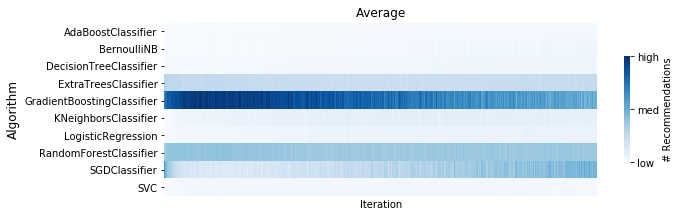

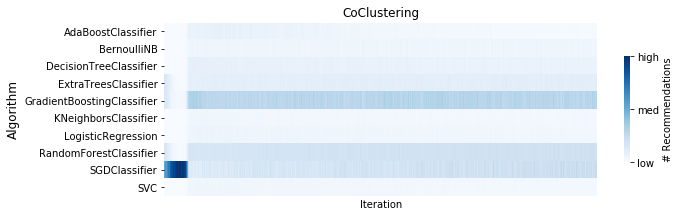

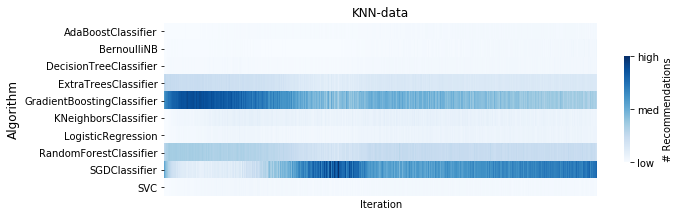

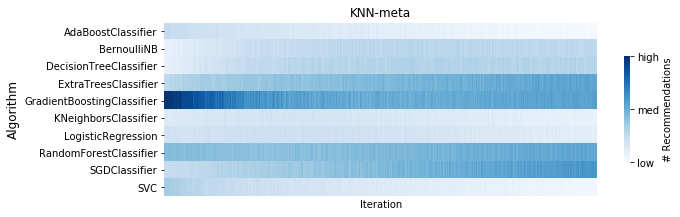

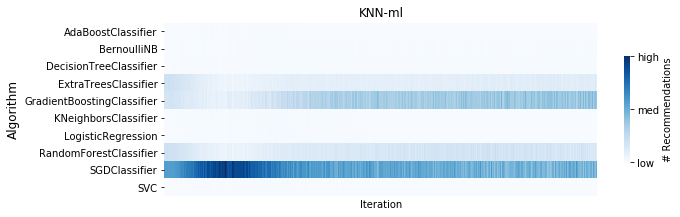

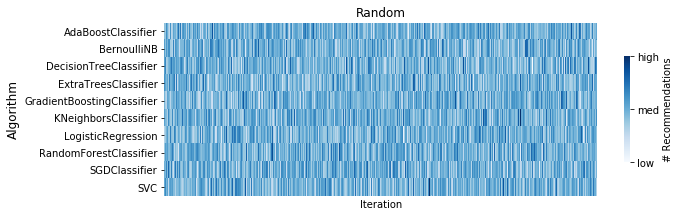

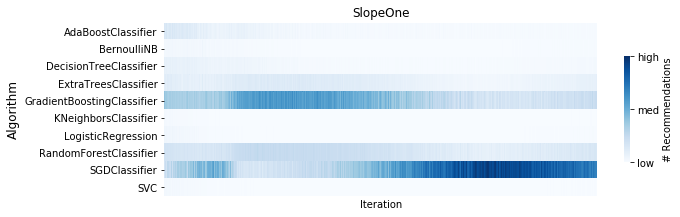

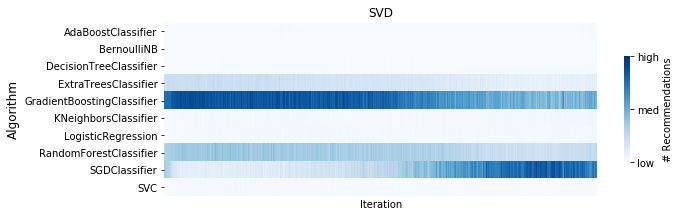

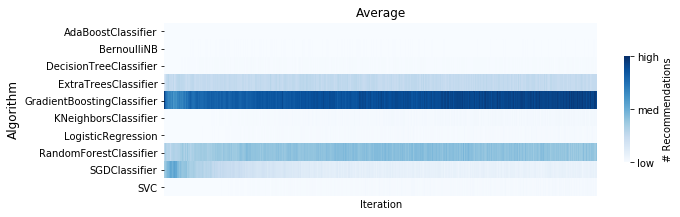

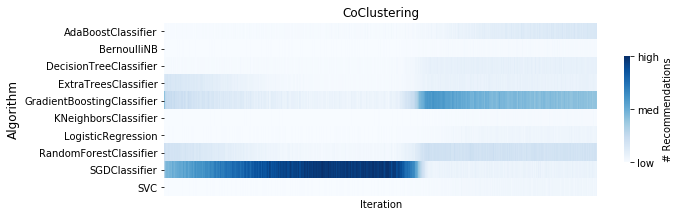

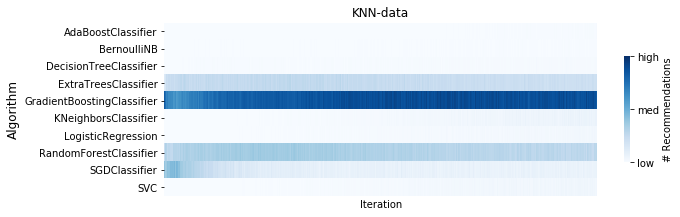

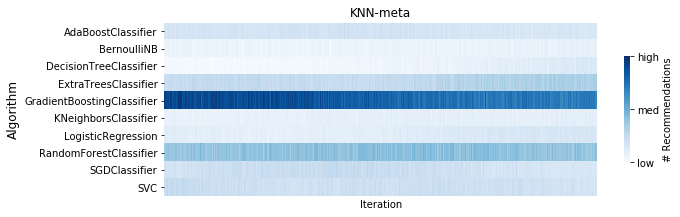

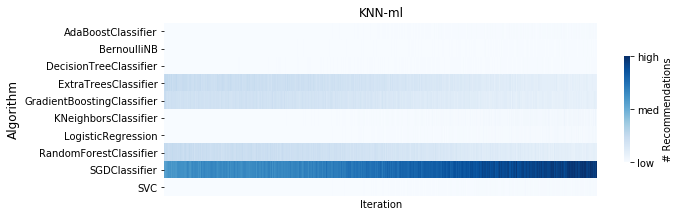

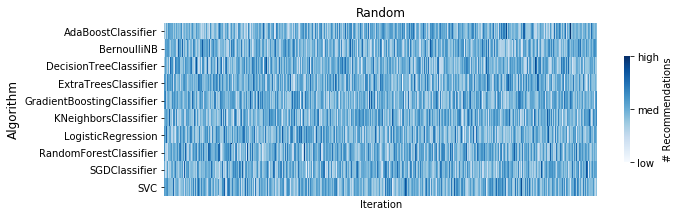

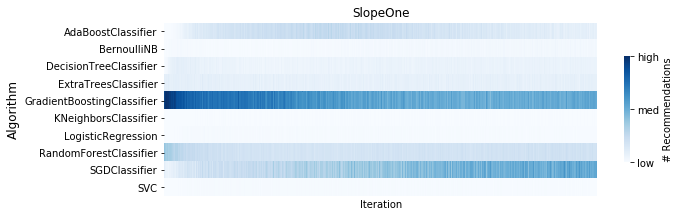

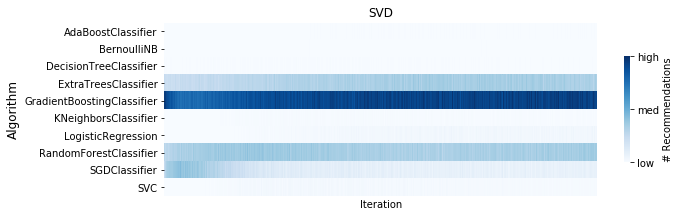

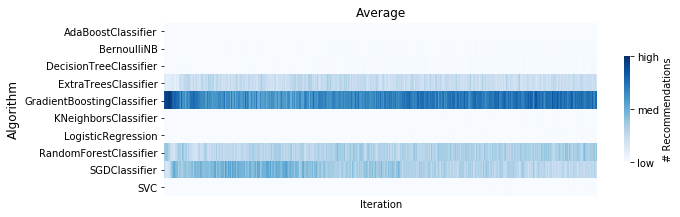

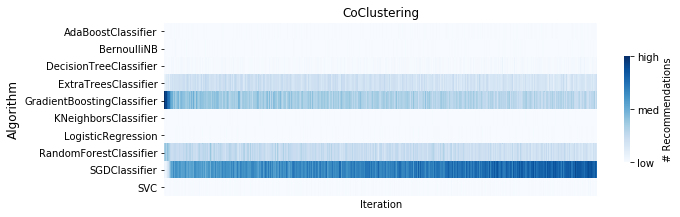

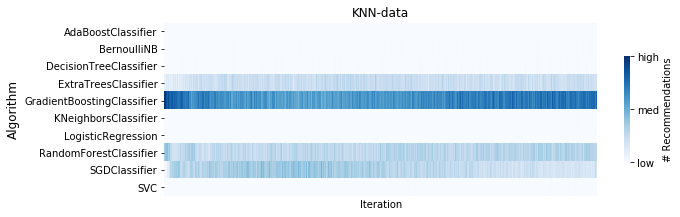

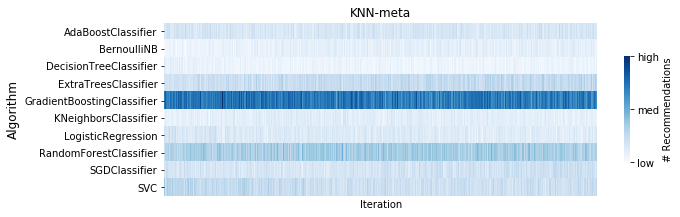

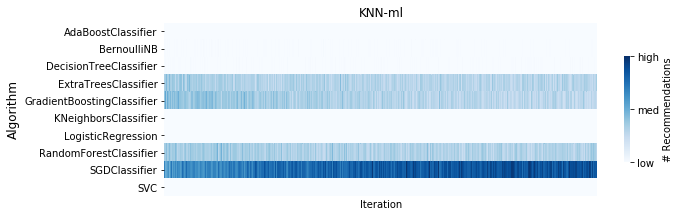

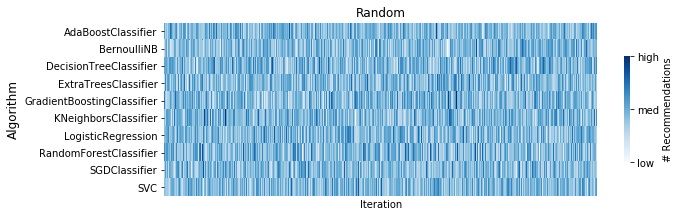

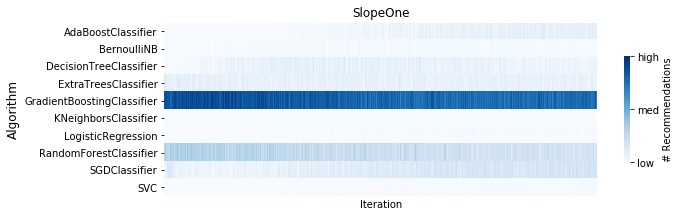

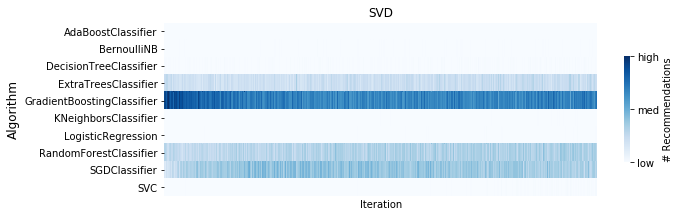

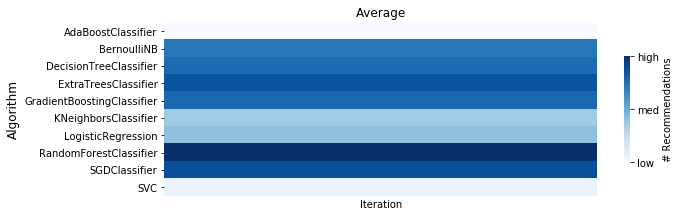

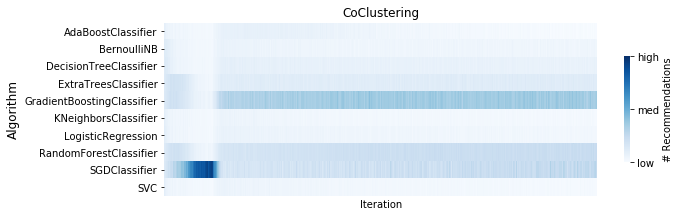

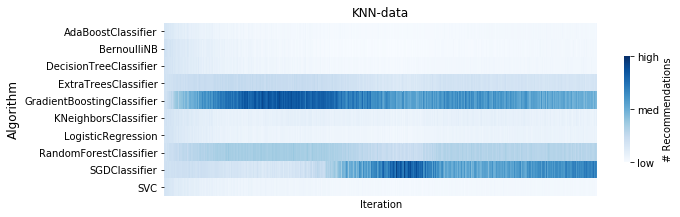

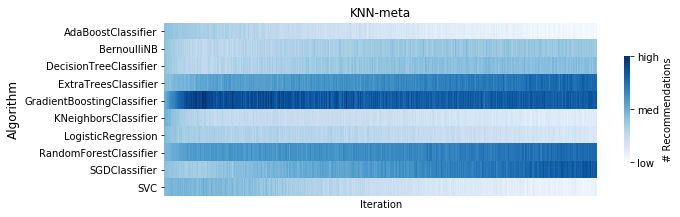

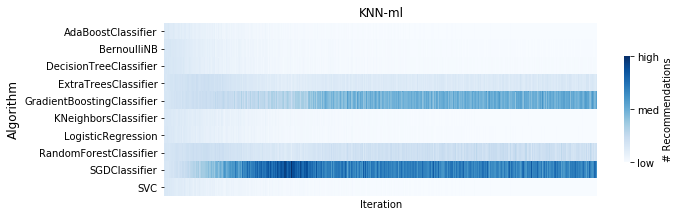

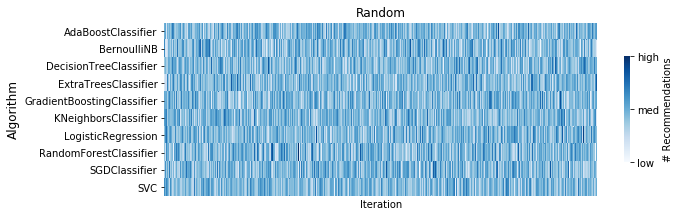

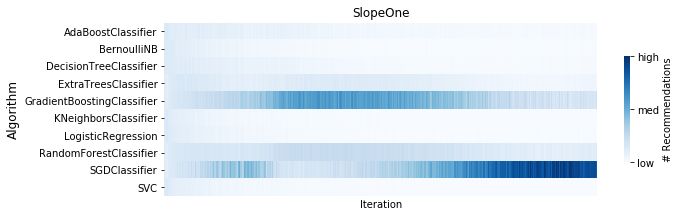

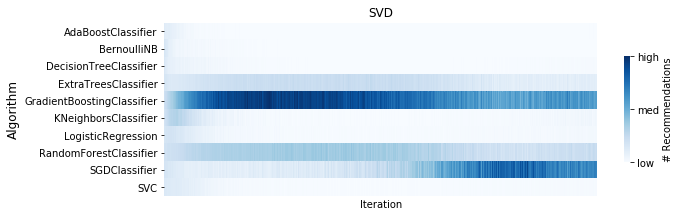

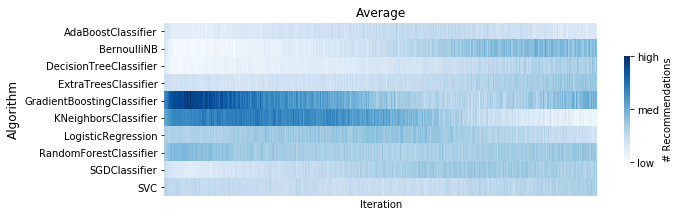

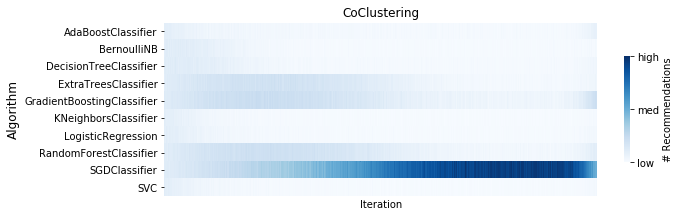

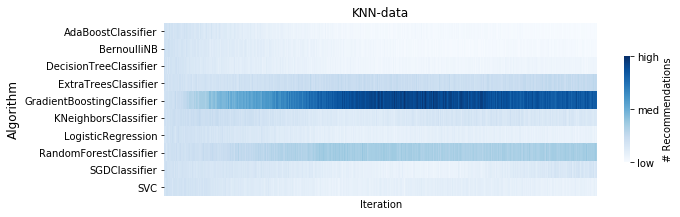

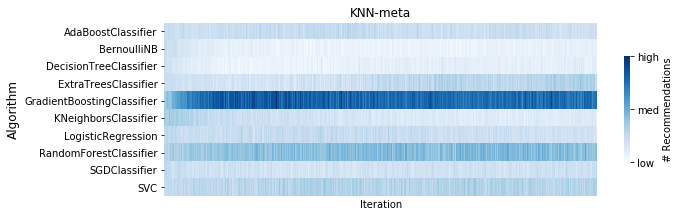

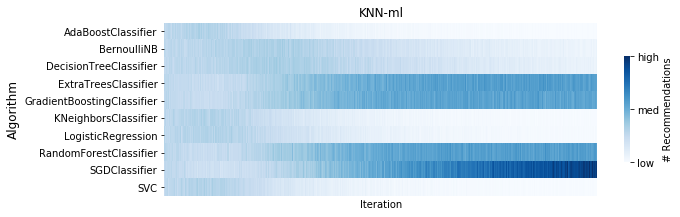

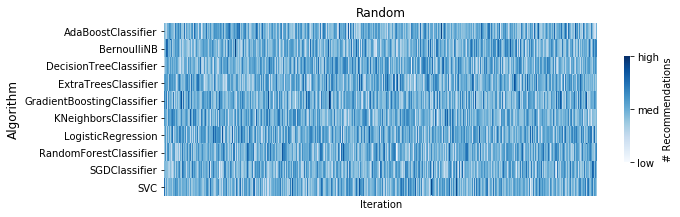

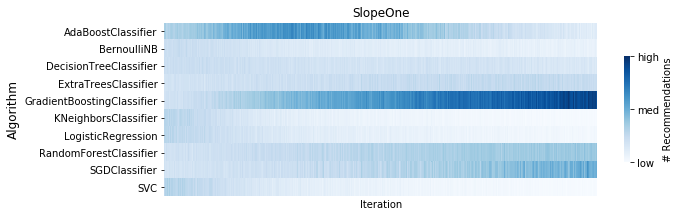

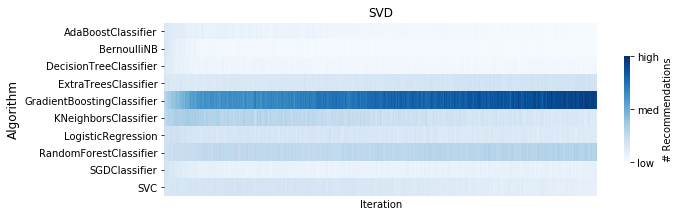

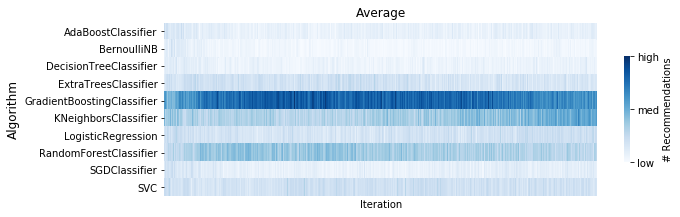

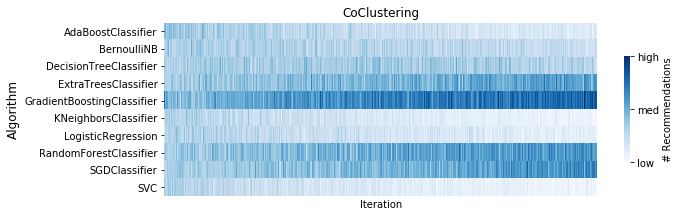

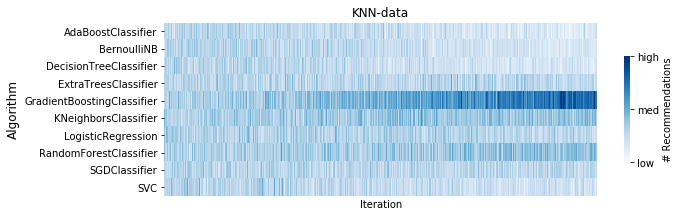

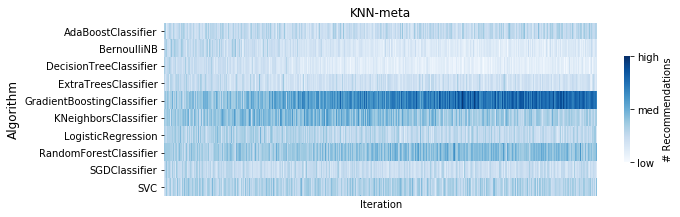

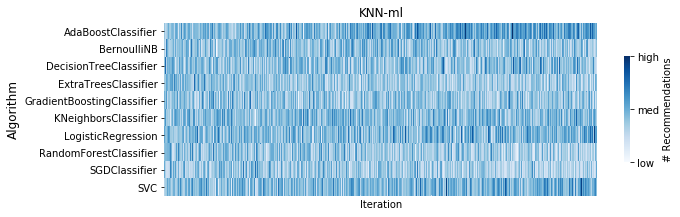

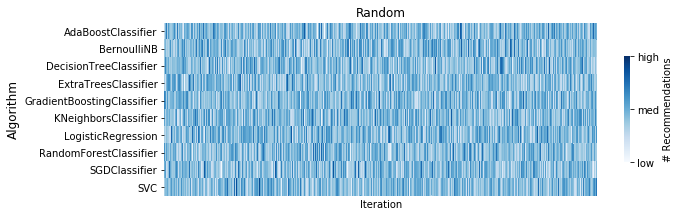

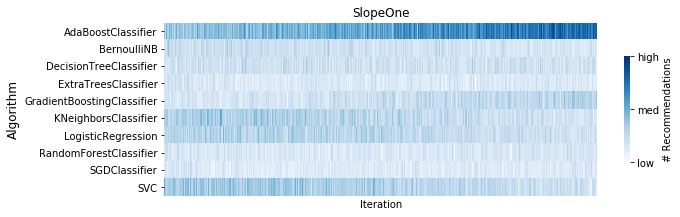

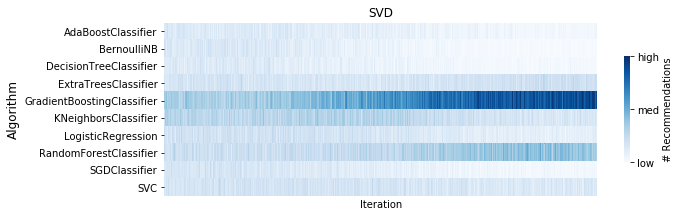

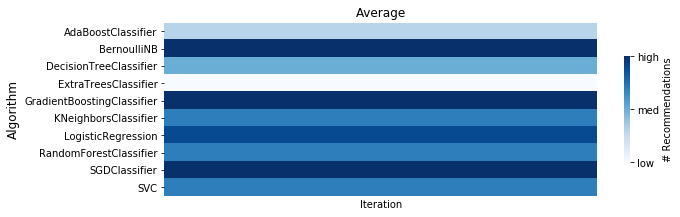

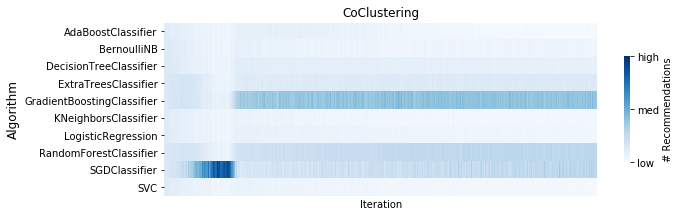

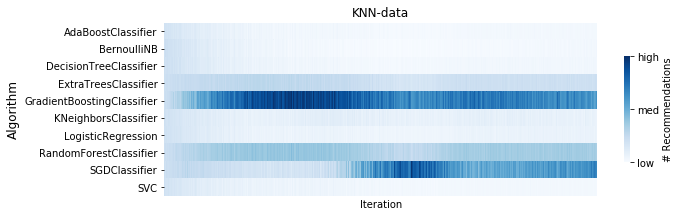

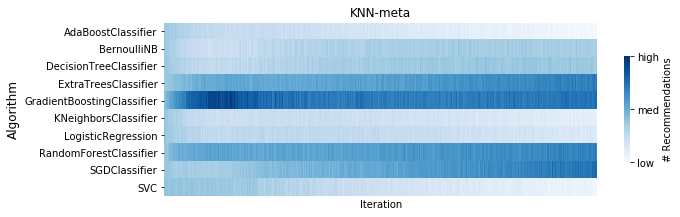

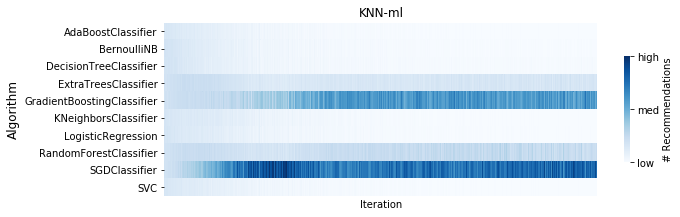

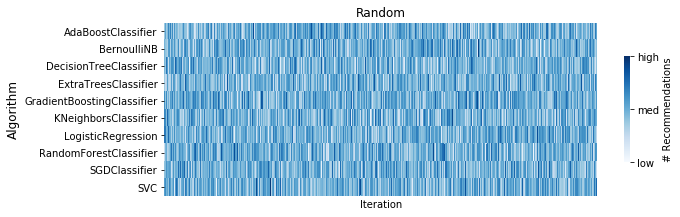

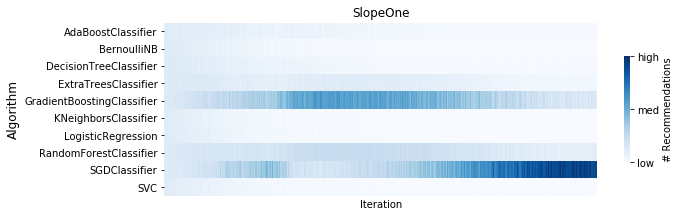

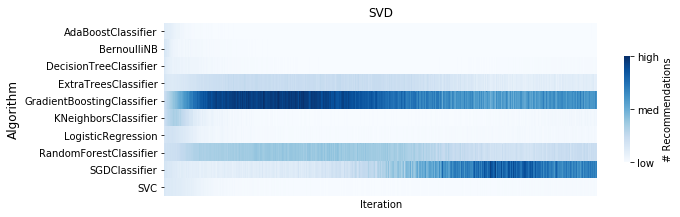

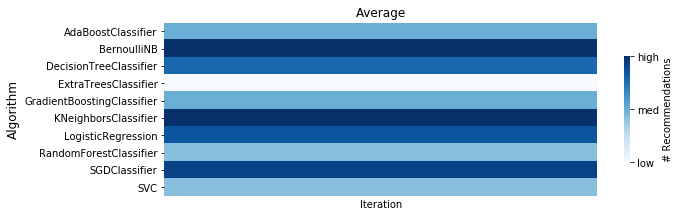

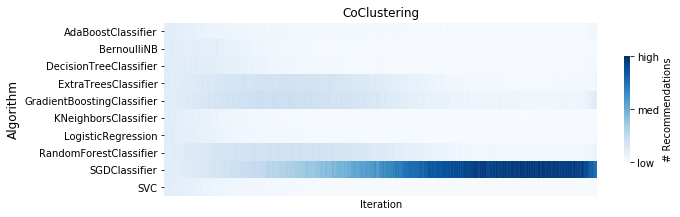

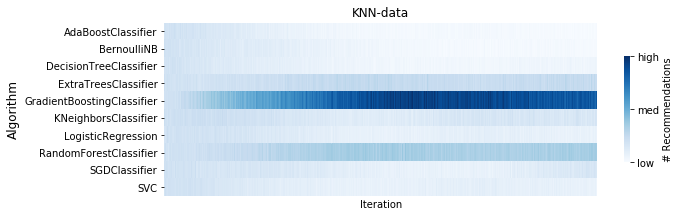

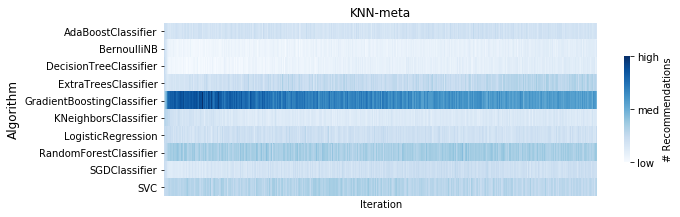

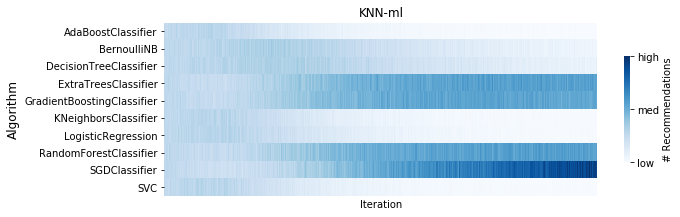

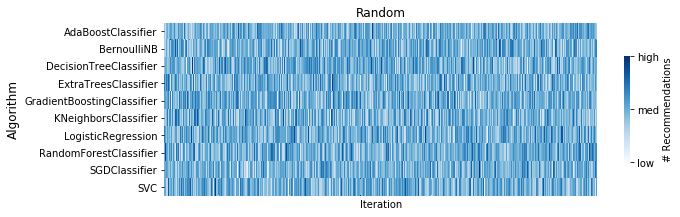

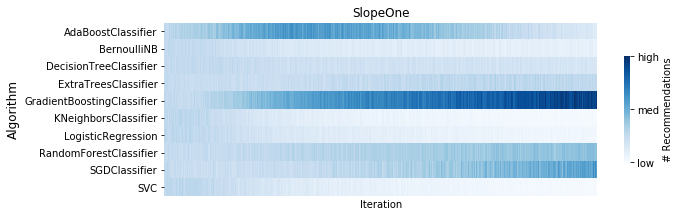

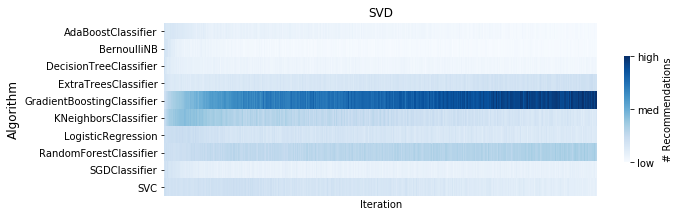

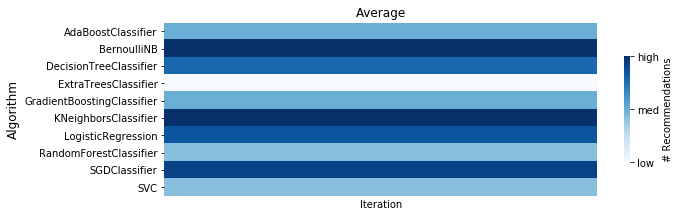

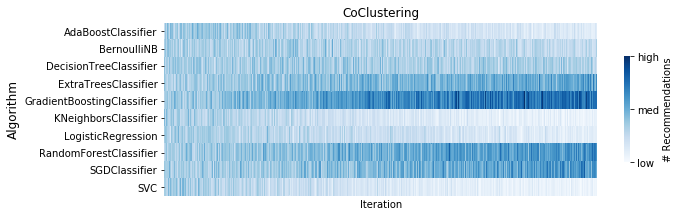

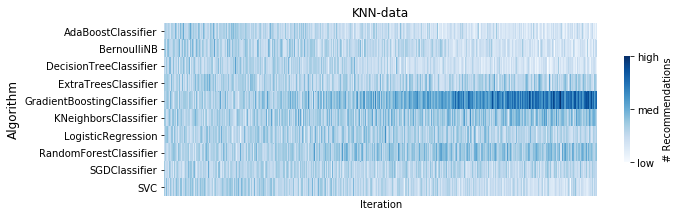

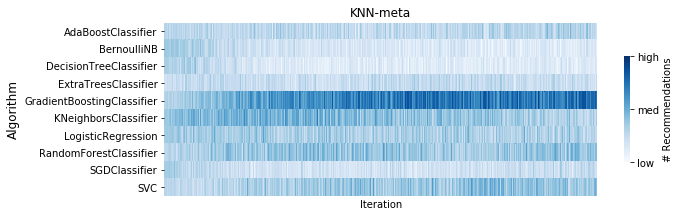

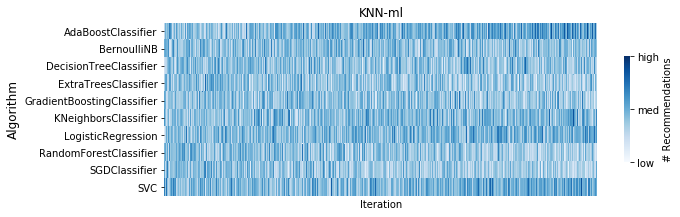

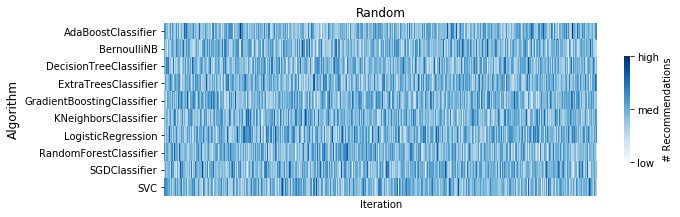

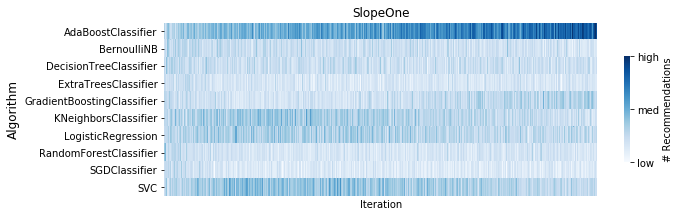

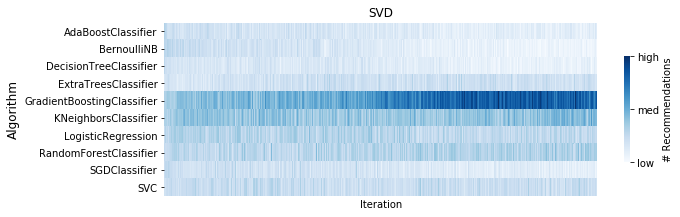

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pdb
import os
# generate figure of heatmap showing counts of which ML methods are recommended over time
# experiment = '../experiment_sklearn-benchmark5-data-mock_experimentknn-random-average-meta_10recs_200trials_10init.csv'


# experiment = '../experiment_random-average_100recs_500trials_1init.csv'
accumulate = False

files = glob(resdir+'/summary/*heatmap.csv')
for f in sorted(files):
    df = pd.read_csv(f)
    print(f) 
    ninit = f.split('ninit-')[-1].split('_')[0]
    nrecs = f.split('nrecs-')[-1].split('_')[0]
    dataset=f.split('experiment_')[-1].split('ninit')[0]
    algs = [c for c in df.columns if c != 'iteration']
    iterations = df['iteration'].max()
    print('algs:',algs)
    print('iterations',iterations)
    for recommender,dfg in df.groupby('recommender'):
        h = plt.figure(figsize=(10, 15))
        ax = h.gca()
#         pdb.set_trace()
        dfgi = dfg.set_index('iteration').transpose()
        dfgi = dfgi.drop('recommender') 
#         pdb.set_trace()
        dfgi = dfgi.apply(pd.to_numeric)
        low = dfgi.min().min()
        high = dfgi.max().max()
        medium = (high+low)/2
        sns.heatmap(data=dfgi, ax =ax, 
                    cbar_kws={'shrink':0.1,'label':'# Recommendations','ticks':[low,medium,high]},
                    cmap=plt.cm.Blues
                   )
        cbar_ax = h.axes[-1]
        cbar_ticks = cbar_ax.get_yticks()
#         pdb.set_trace()
#         cbar_ax.set_yticks([cbar_ticks[0],cbar_ticks[-1]])  # vertically oriented colorbar
        cbar_ax.set_yticklabels(['low','med','high'])  # vertically oriented colorbar
 
#        for label in cbar.ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False) 
#         ave_count_mat = dfg.drop('iteration').values.transpose() 
#         print('ave_count_mat:',ave_count_mat)
#         print('count_mat:',ave_count_mat.shape)
#         tmp = ax.matshow(ave_count_mat,cmap=plt.cm.coolwarm)
        # sb.heatmap(ave_count_mat)#,
                   #cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
        #            square=False, annot=True, vmin=0., vmax=1.0,
        #            xticklabels=iterations, yticklabels=algs, cbar=False)
#         cbar=plt.colorbar(tmp,ax=ax,orientation='vertical',shrink=0.1)
#         cbar.set_label('Recommendations')
#         ax.set_xticklabels(rotation=0)
        plt.yticks(rotation=0)
#         ax.set_yticks(np.arange(len(algs)))
#         ax.set_yticklabels(algs)
#         ax.set_xticklabels([])
#         plt.title(dataset+', ninit ='+ninit+', nrecs='+nrecs)
        plt.title(nice_rec[recommender])
        ax.set_xticks([])
        ax.set_xlabel('Iteration', fontsize=10)
        ax.set_ylabel('Algorithm',fontsize=12)
        #plt.title('ML Recommendations over many datasets', fontsize=18)
        ax.set_aspect(40)
        h.tight_layout()
#         if accumulate:
#             h.savefig(savename+'_'+recommender+'_heatmap_cumulative.pdf', bbox_inches='tight')
#         else:
        if not os.path.exists(savedir): 
            os.mkdir(savedir)
        h.savefig(savedir+savename+'_'+recommender+'_heatmap'+
                  '_nrecs-'+str(nrecs)+'_ninit-'+str(ninit) +'.pdf', bbox_inches='tight')

plt.show()

#
# leave one out analysis
#

success rate for SVD versus hyperopt


## load pmlb results

In [5]:
from tqdm import tqdm
from glob import glob 
import pandas as pd

pmlb_results_file = ('/media/bill/Drive/projects/pennai/analysis/notebooks/'+
    'pmlb_sklearn-benchmark2-data-mock_experiment.tsv.gz')
df_pmlb = pd.read_csv(pmlb_results_file,compression='gzip',sep=None,engine='python')
df_pmlb

dataset           algorithm  seed  \
0        agaricus-lepiota  AdaBoostClassifier  1393   
1        agaricus-lepiota  AdaBoostClassifier  1393   
2        agaricus-lepiota  AdaBoostClassifier  1393   
3        agaricus-lepiota  AdaBoostClassifier  1393   
4        agaricus-lepiota  AdaBoostClassifier  1393   
...                   ...                 ...   ...   
1244931             yeast                 SVC  1393   
1244932             yeast                 SVC  1393   
1244933             yeast                 SVC  1393   
1244934             yeast                 SVC  1393   
1244935             yeast                 SVC  1393   

                                                parameters  bal_accuracy  \
0        {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.984774   
1        {'algorithm': 'SAMME.R', 'base_estimator': Non...      1.000000   
2        {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.915847   
3        {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.978882   
4        {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.999672   
...                                                    ...           ...   
1244931  {'C': 0.01, 'cache_size': 200, 'class_weight':...      0.308549   
1244932  {'C': 0.1, 'cache_size': 200, 'class_weight': ...      0.546284   
1244933  {'C': 0.1, 'cache_size': 200, 'class_weight': ...      0.550977   
1244934  {'C': 1, 'cache_size': 200, 'class_weight': No...      0.606683   
1244935  {'C': 1, 'cache_size': 200, 'class_weight': No...      0.608445   

         test_bal_accuracy  
0                 0.986054  
1                 1.000000  
2                 0.908704  
3                 0.980518  
4                 0.999483  
...                    ...  
1244931           0.111111  
1244932           0.271769  
1244933           0.269028  
1244934           0.485774  
1244935           0.484840  

[1244936 rows x 6 columns]

## load hyperopt results

In [6]:
hypedir = '/media/bill/Drive/projects/pennai/analysis/results_r2/*/*Hyper*.csv'
frames = []
for f in glob(hypedir):
#     print(f)
    df = pd.read_csv(f)
    if 'Custom' in f:
        df['algorithm'] = 'hyperopt_estimator_custom'
    frames.append(df)
    
hype_results = pd.concat(frames)
# take seed 1393
hype_results = hype_results.loc[hype_results.seed==1393]
# add an iteration column 
hype_results['iteration'] = hype_results['parameters'].apply(lambda x: int(x[x.find("max_evals':")+11:
                                                               x.find(',',x.find("max_evals':")+11)])
                                                            )
print(hype_results.columns)

Index(['parameters', 'bal_accuracy', 'test_bal_accuracy', 'seed', 'dataset',
       'algorithm', 'parameters_hash', 'iteration'],
      dtype='object')


## load autosklearn results

In [7]:
autosklearndir = '/media/bill/Drive/projects/pennai/analysis/results_autosklearn/*/*.csv'
frames = []
misses = 0
for f in glob(autosklearndir):
    if 'cv_results' in f: 
        continue
#     print(f)
    try:
        df = pd.read_csv(f)
    except Exception as e:
#         print('couldnt open',f)#,':',e)
        misses +=1 
        continue
    if 'NoPrep' in f:
        if 'NoEnsemble' in f:
            df['algorithm'] = 'autosklearn_noprep_noensemble'
        else:
            df['algorithm'] = 'autosklearn_noprep'
    if 'Hill_Valley_without_noise' in df.dataset.values:
#         pdb.set_trace()
        print(50*'=','\n','Hill Valley w/out noise in file',f,'. len(df):',len(df),'\n',50*'=')
    frames.append(df)
    
# pdb.set_trace()
autosklearn_results = pd.DataFrame()
autosklearn_results = pd.concat(frames)
# take seed 1393
autosklearn_results = autosklearn_results.loc[autosklearn_results.seed==1393]
# add a time column
autosklearn_results['iteration'] = autosklearn_results['parameters'].apply(
    lambda x: int(
        x[x.find("time_left_for_this_task':")+25: x.find(',', x.find("time_left_for_this_task':")+25)]
    ))
print(autosklearn_results.columns)
print('loaded',len(autosklearn_results),'results')

 Hill Valley w/out noise in file /media/bill/Drive/projects/pennai/analysis/results_autosklearn/Hill_Valley_without_noise/Hill_Valley_without_noise_AutoSklearn.csv . len(df): 3 
 Hill Valley w/out noise in file /media/bill/Drive/projects/pennai/analysis/results_autosklearn/Hill_Valley_without_noise/Hill_Valley_without_noise_AutoSklearnNoPrep.csv . len(df): 4 
 Hill Valley w/out noise in file /media/bill/Drive/projects/pennai/analysis/results_autosklearn/Hill_Valley_without_noise/Hill_Valley_without_noise_AutoSklearnNoPrepNoEnsemble.csv . len(df): 4 
Index(['parameters', 'bal_accuracy', 'test_bal_accuracy', 'seed', 'dataset',
       'algorithm', 'parameters_hash', 'iteration'],
      dtype='object')
loaded 1749 results


## calculate the best scores on each dataset

In [8]:
# best score could come from df_pmlb, or hyperopt or sklearn results
# combine dataframes
df_combined = pd.concat([df_pmlb, hype_results, autosklearn_results])
best_score = df_combined.groupby('dataset')['test_bal_accuracy'].max().to_dict()


In [9]:
best_score

{'GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1': 0.7689180737961225,
 'GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1': 0.6386217948717949,
 'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1': 0.7910657051282051,
 'GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1': 0.6575668101291162,
 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM-2_001': 0.7241586538461539,
 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM-2_001': 0.7567560804724252,
 'Hill_Valley_with_noise': 0.9836546888694128,
 'Hill_Valley_without_noise': 1.0,
 'adult': 0.8057092233995391,
 'agaricus-lepiota': 1.0,
 'allbp': 0.8409380474597866,
 'allhyper': 0.8276628288558875,
 'allhypo': 0.9432843516370198,
 'allrep': 0.8455589096231249,
 'analcatdata_aids': 0.9166666666666669,
 'analcatdata_asbestos': 1.0,
 'analcatdata_authorship': 1.0,
 'analcatdata_bankruptcy': 1.0,
 'analcatdata_boxing1': 0.9545454545454546,
 'analcatdata_boxing2': 0.9022556390977444,
 'analcatdata_creditscore': 1.0,
 'analcatdata_cyyoung8092': 1.0,
 

## load pennai results

In [10]:
resdir = 'results_pmlb2_r2'
# knowledge_base='sklearn'
knowledge_base='pmlb_sklearn'
# knowledge_base='hibachi'
frames = []

experiment = (resdir +'/loo_results_r3/leaveoneout_'+knowledge_base+'*.csv')
savename = experiment.split('/')[-1].replace('*','_all_').split('.csv')[0]
for i,f in tqdm(enumerate(glob(experiment))):
    df = pd.read_csv(f)
    # store dataframe of mean, median, 
    frames.append(df)
pennai_results = pd.concat(frames)
pennai_results.rename(columns={'holdout_bal_accuracy':'test_bal_accuracy'},inplace=True)
# filter out any datasets not in pmlb results file (there shouldn't be any but just be safe)
pennai_results = pennai_results.loc[pennai_results.dataset.isin(best_score.keys())]
## we should probably drop the success columns and recalculate them
pennai_results = pennai_results.drop([s for s in pennai_results.columns if 'success' in s],axis=1)
print('columns:',pennai_results.columns)
print('loaded',len(pennai_results),'experiments')

304it [00:07, 41.32it/s]


columns: Index(['iteration', 'n_recs', 'iters', 'recommender', 'dataset', 'ml-rec',
       'p-rec', 'score-rec', 'bal_accuracy', 'test_bal_accuracy',
       'max_bal_accuracy', 'delta_bal_accuracy'],
      dtype='object')
loaded 2731096 experiments


In [11]:
pennai_results

iteration  n_recs  iters recommender           dataset  \
0             0       1  10000      random  agaricus-lepiota   
1             1       1  10000      random  agaricus-lepiota   
2             2       1  10000      random  agaricus-lepiota   
3             3       1  10000      random  agaricus-lepiota   
4             4       1  10000      random  agaricus-lepiota   
...         ...     ...    ...         ...               ...   
8037       8037       1  10000         svd             yeast   
8038       8038       1  10000         svd             yeast   
8039       8039       1  10000         svd             yeast   
8040       8040       1  10000         svd             yeast   
8041       8041       1  10000         svd             yeast   

                          ml-rec  \
0           KNeighborsClassifier   
1           ExtraTreesClassifier   
2         RandomForestClassifier   
3           ExtraTreesClassifier   
4         DecisionTreeClassifier   
...                          ...   
8037  GradientBoostingClassifier   
8038          AdaBoostClassifier   
8039          AdaBoostClassifier   
8040          AdaBoostClassifier   
8041          AdaBoostClassifier   

                                                  p-rec  score-rec  \
0     {'algorithm': 'auto', 'leaf_size': 30, 'metric...   0.000000   
1     {'bootstrap': False, 'class_weight': None, 'cr...   0.000000   
2     {'bootstrap': True, 'class_weight': None, 'cri...   0.000000   
3     {'bootstrap': False, 'class_weight': None, 'cr...   0.000000   
4     {'class_weight': None, 'criterion': 'gini', 'm...   0.000000   
...                                                 ...        ...   
8037  {'criterion': 'friedman_mse', 'init': None, 'l...   0.027099   
8038  {'algorithm': 'SAMME.R', 'base_estimator': Non...   0.023866   
8039  {'algorithm': 'SAMME.R', 'base_estimator': Non...   0.024324   
8040  {'algorithm': 'SAMME.R', 'base_estimator': Non...   0.016586   
8041  {'algorithm': 'SAMME.R', 'base_estimator': Non...   0.008279   

      bal_accuracy  test_bal_accuracy  max_bal_accuracy  delta_bal_accuracy  
0         1.000000           1.000000          1.000000            0.000000  
1         0.923378           0.921149          1.000000            0.078851  
2         0.856089           0.839739          1.000000            0.160261  
3         0.934675           0.934194          1.000000            0.065806  
4         0.512279           0.500000          1.000000            0.500000  
...            ...                ...               ...                 ...  
8037      0.088680           0.069517          0.591358            0.882446  
8038      0.238921           0.244069          0.591358            0.587273  
8039      0.298280           0.138432          0.591358            0.765909  
8040      0.224386           0.159719          0.591358            0.729911  
8041      0.228300           0.236831          0.591358            0.599512  

[2731096 rows x 12 columns]

## accumulation functions

In [12]:
# get cumulative successes
def get_successes(df_in):
    ndatasets = df_in.dataset.nunique()
    print('getting successes. number of datasets:',ndatasets)
    df_summary = pd.DataFrame()
    frames = []
    for (rec,iteration), dfg in df_in.groupby(['recommender','iteration']):
        for thresh in ['01','02','03','04','05']:
            tmp_df = {}
            tmp_df['iteration'] = iteration
            tmp_df['recommender'] = rec
            tmp_df['threshold'] = thresh
#             tmp_df['successes'] = dfg['success_'+thresh].sum()/dfg.dataset.nunique()
            tmp_df['successes'] = dfg['success_'+thresh].sum()/ndatasets
            frames.append(tmp_df)
    df_summary = pd.DataFrame.from_records(frames, columns=frames[0].keys())
    return df_summary

In [13]:
# get test set deltas 
import scipy.stats

def get_deltas(df_in):
    ndatasets = df_in.dataset.nunique()
    print('getting deltas. number of datasets:',ndatasets)
    df_summary = pd.DataFrame()
    frames = []
    for (rec,iteration), dfg in df_in.groupby(['recommender','iteration']):
            tmp_df = {}
            tmp_df['iteration'] = iteration
            tmp_df['recommender'] = rec
            tmp_df['mean_delta_bal_accuracy'] = dfg['delta_bal_accuracy'].mean()
            tmp_df['median_delta_bal_accuracy'] = dfg['delta_bal_accuracy'].median()
            tmp_df['std_delta_bal_accuracy'] = dfg['delta_bal_accuracy'].std()
#             pdb.set_trace()
            tmp_df['se_delta_bal_accuracy'] = scipy.stats.sem(dfg['delta_bal_accuracy'].values)
            frames.append(tmp_df)
    df_summary = pd.DataFrame.from_records(frames, columns=frames[0].keys())
    return df_summary

In [14]:
from tqdm import tqdm 
import pdb

def success_rates(df, iteration_reset=True):
    """calculates success rates for different thresholds"""
    frames = []
    for dataset,dfg in tqdm(df.groupby('dataset')):
        for alg, dfgalg in dfg.groupby('recommender'):
            thresh_history = {}
            for it, dfgitsalg in dfgalg.groupby('iteration'):
                dct = {'recommender':alg}
                dct['iteration'] = it
                dct['dataset'] = dataset
                for threshold in ['01','02','03','04','05']:
                    if 'success_'+threshold not in thresh_history.keys():
                        thresh_history['success_'+threshold] = False
                    dct['threshold'] = threshold
                    thresh = float(threshold)/100
    #                 print('thresh:',thresh)
                    test_bal_accuracy = dfgitsalg['test_bal_accuracy'].values[0]
                    if len(dfgitsalg['test_bal_accuracy'].values) > 1:
                        print('dfgitsalg is too long')
                        pdb.set_trace()
                    dct['delta_bal_accuracy'] =  (best_score[dataset] - test_bal_accuracy)/best_score[dataset]
                    if iteration_reset:
                        dct['success_'+threshold] = dct['delta_bal_accuracy'] <= thresh
                    else:
                        dct['success_'+threshold] = (thresh_history['success_'+threshold] 
                                                     or  dct['delta_bal_accuracy'] <= thresh)
                        thresh_history['success_'+threshold] = dct['success_'+threshold] 
#                     print(dct['delta_bal_accuracy'],'<=',thresh,'=',dct['success_'+threshold])
                frames.append(dct)
    df_sum = pd.DataFrame.from_records(frames,columns=frames[0].keys())
    return df_sum

In [15]:
from tqdm import tqdm 

def success_rates_pennai(df, iteration_reset=True):
    """calculates success rates for different thresholds"""
    frames = []
    for dataset,dfg in tqdm(df.groupby('dataset')):
        for alg, dfgalg in dfg.groupby('recommender'):
            thresh_history = {}
            # this stores the best balanced accuracy pennai has seen
            best_bal_accuracy = 0
            # pennai selects a model based on balanced accuracy. 
            # select_test_bal_accuracy stores the test score of the selected best model
            select_test_bal_accuracy = 0
            for it, dfgitsalg in dfgalg.groupby('iteration'):
                dct = {'recommender':alg}
                dct['iteration'] = it
                dct['dataset'] = dataset
                for threshold in ['01','02','03','04','05']:
                    if 'success_'+threshold not in thresh_history.keys():
                        thresh_history['success_'+threshold] = False
                    dct['threshold'] = threshold
                    thresh = float(threshold)/100
    #                 print('thresh:',thresh)
                    test_bal_accuracy = dfgitsalg['test_bal_accuracy'].values[0]
                    if len(dfgitsalg['test_bal_accuracy'].values) > 1:
                        print('dfgitsalg is too long')
                        pdb.set_trace()
                    bal_accuracy = dfgitsalg['bal_accuracy'].values[0]
                    if bal_accuracy > best_bal_accuracy:
                        best_bal_accuracy = bal_accuracy
                        select_test_bal_accuracy = test_bal_accuracy
#                         print(dataset[:10],', it',it,',',alg,'BA:',best_bal_accuracy,
#                               ', Test BA:',select_test_bal_accuracy)
                    dct['delta_bal_accuracy'] =  (best_score[dataset] 
                                                  - select_test_bal_accuracy)/best_score[dataset]
                    if iteration_reset:
                        dct['success_'+threshold] = dct['delta_bal_accuracy'] <= thresh
                    else:
                        dct['success_'+threshold] = (thresh_history['success_'+threshold] 
                                                     or  dct['delta_bal_accuracy'] <= thresh)
                        thresh_history['success_'+threshold] = dct['success_'+threshold] 
#                     print(dct['delta_bal_accuracy'],'<=',thresh,'=',dct['success_'+threshold])
                frames.append(dct)
    df_sum = pd.DataFrame.from_records(frames,columns=frames[0].keys())
    return df_sum

## calculate success rates and deltas

In [16]:
print('PennAI...')
print('getting success rates')
df_pennai_loo = success_rates_pennai(pennai_results,iteration_reset=True)
df_pennai_sum = get_successes(df_pennai_loo)
df_pennai_deltas = get_deltas(df_pennai_loo)




PennAI...
getting success rates


100%|██████████| 152/152 [11:19<00:00,  4.32s/it]


getting successes. number of datasets: 152
getting deltas. number of datasets: 152


In [17]:
print('Hyperopt...')
df_hype_sum = success_rates(hype_results.rename(columns={'algorithm':'recommender'}))
df_hype_loo = get_successes(df_hype_sum)
df_hype_deltas = get_deltas(df_hype_sum)

 15%|█▍        | 23/158 [00:00<00:00, 222.97it/s]

Hyperopt...


100%|██████████| 158/158 [00:00<00:00, 203.31it/s]

getting successes. number of datasets: 158
getting deltas. number of datasets: 158


In [18]:
print('Autosklearn...')
df_autosklearn_sum = success_rates(autosklearn_results.rename(columns={'algorithm':'recommender'}))
df_autosklearn_loo = get_successes(df_autosklearn_sum)
df_autosklearn_deltas = get_deltas(df_autosklearn_sum)

 12%|█▏        | 19/165 [00:00<00:00, 188.14it/s]

Autosklearn...


100%|██████████| 165/165 [00:00<00:00, 173.46it/s]

getting successes. number of datasets: 165
getting deltas. number of datasets: 165


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a3fbd080>,
      dtype=object)

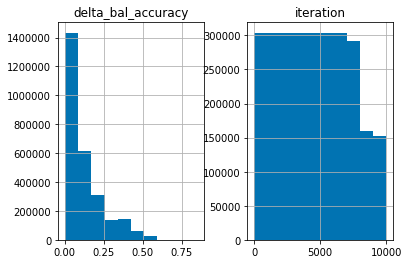

In [19]:
df_pennai_loo[['recommender', 'iteration', 'dataset', 'threshold',
       'delta_bal_accuracy']].hist()

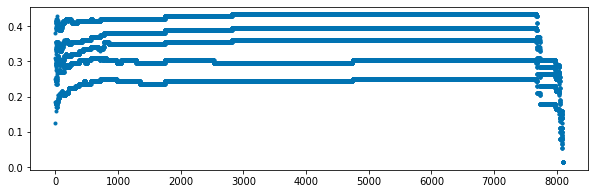

In [20]:
dfplt = df_pennai_sum.loc[df_pennai_sum.recommender=='svd']
h = plt.figure(figsize=(10,3))
plt.plot(dfplt.iteration, dfplt.successes, '.') 

## plot comparisons

nicet: {'01': '1%', '02': '2%', '03': '3%', '04': '4%', '05': '5%'}
autosklearn_noprep
autosklearn_noprep
[   0    1    3    9   20   45   99  214  463  999 7500]
[   0    1    3    9   20   45   99  214  463  999 7500]


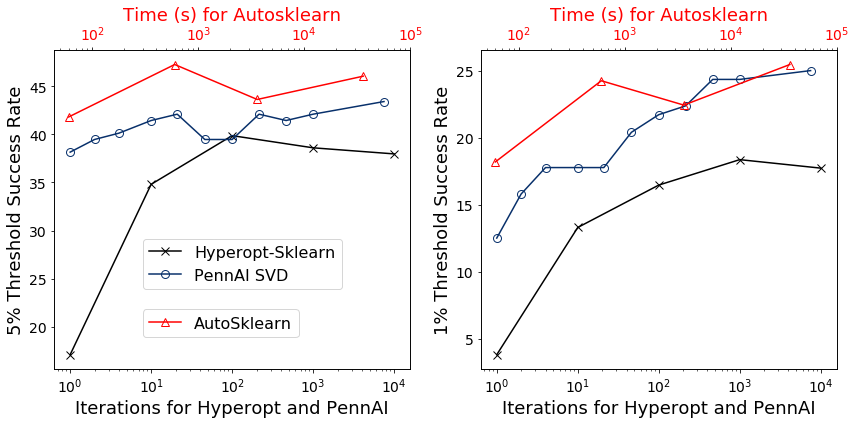

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
import numpy as np
import math 
%matplotlib inline
cmap={}
cmap['svd']=plt.get_cmap("Blues",df_pennai_sum.threshold.nunique())#[::-1]
cmap['random']=plt.get_cmap("Greens",df_pennai_sum.threshold.nunique())#[::-1]
cmap['hyperopt_estimator']=plt.get_cmap("Greys",df_hype_loo.threshold.nunique())#[::-1]
cmap['hyperopt_estimator_custom']=plt.get_cmap("Greys",df_hype_loo.threshold.nunique())#[::-1]
cmap['AutoSklearnClassifier']=plt.get_cmap("Reds",df_autosklearn_loo.threshold.nunique())#[::-1]
cmap['autosklearn_noprep']=plt.get_cmap("Reds",df_autosklearn_loo.threshold.nunique())#[::-1]
cmap['autosklearn_noprep_noensemble']=plt.get_cmap("Reds",df_autosklearn_loo.threshold.nunique())#[::-1]
nthresh = df_pennai_sum.threshold.nunique()
import pdb
h = plt.figure(figsize=(12,6))

linestyles = ['-','--','-.',':',':',':',':',':']
nicealg = {'hyperopt_estimator_custom':'Hyperopt-Sklearn Custom',
           'hyperopt_estimator':'Hyperopt-Sklearn',
           'AutoSklearnClassifier':'AutoSklearn',
#           'autosklearn_noprep':'AutoSklearn w/o Preprocessors',
           'autosklearn_noprep_noensemble':'AutoSklearn w/o Prep or Ensemble',
           'autosklearn_noprep':'AutoSklearn'}
mrk = {'svd':'o',
       'hyperopt_estimator':'x',
       'hyperopt_estimator_custom':'o',
       'AutoSklearnClassifier':'+',
       'autosklearn_noprep':'^',
       'autosklearn_noprep_noensemble':'s',
       'random':'>'}
nicet = {s:s[1]+'%' for s in ['01','02','03','04','05']}
print('nicet:',nicet)
# thresholds_to_plot = ['01','02','03','04','05']
thresholds_to_plot = ['01','05']
ax = {}
ax['05'] = h.add_subplot(1,2,1)
ax['01'] = h.add_subplot(1,2,2)
nthresh = len(thresholds_to_plot)
# Hyperopt
for i, (alg, dfg) in enumerate(df_hype_loo.groupby('recommender')):
    if alg == 'hyperopt_estimator':
        for j,(thresh,dfgalg) in enumerate(dfg.groupby('threshold')):
            level = 0
            if thresh in thresholds_to_plot:
                ax[thresh].plot(dfgalg['iteration'],dfgalg['successes']*100, 
                                color=cmap[alg](1-(level/nthresh)*.5), 
                     marker=mrk[alg],markerfacecolor='none',markersize=8, label=nicealg[alg])
                level +=1
        
# # AutoSklearn
ax2 = {}
for thresh in thresholds_to_plot:
    ax2[thresh] = ax[thresh].twiny()
for i, (alg, dfg) in enumerate(df_autosklearn_loo.groupby('recommender')):
#     print('i:',i)
    if alg != 'autosklearn_noprep':
        continue
        
    for j,(thresh,dfgalg) in enumerate(dfg.groupby('threshold')):
        level = 0
        if thresh in thresholds_to_plot:
#         print('j:',j)
#             for k,(time,dfgalgit) in enumerate(dfgalg.groupby('iteration')):
    #             print('k:',k)
    #             print(thresh,alg,time,thresh)
    #             print(dfgalgit)
    #             pdb.set_trace()s
            print(alg)
            ax2[thresh].plot(dfgalg['iteration'],dfgalg['successes'].values*100,#dfgalgit['successes'].values*100],
#                      color=cmap[alg](1-(level/nthresh)), 
                     color='r',
                     marker=mrk[alg],markerfacecolor='none',markersize=8,
#                      linestyle=linestyles[j],
                     label=nicealg[alg])
#             ax2[thresh].set_xticks([10**2,10**3,10**4,10**5])
            level += 1

# PennAI
# print(space)
for i, (alg, dfalg) in enumerate(df_pennai_sum.groupby('recommender')):
    if alg == 'svd':
        for j,(thresh,dfg) in enumerate(dfalg.groupby('threshold')):
            level = 0
            if thresh in thresholds_to_plot:
                space = np.unique(np.logspace(0,math.floor(np.log10(dfg.iteration.max())),10,dtype=int)-1)
                space = np.hstack((space,7500))
                print(space)
                if mrk[alg] != '':
                    ax[thresh].plot(dfg['iteration'].values[space]+1,
                            dfg['successes'].values[space]*100, 
                            color=cmap[alg](1-(level/nthresh)*.5), 
#                             linestyle=linestyles[j],
                            marker=mrk[alg],
                            markerfacecolor='none',
                            markersize=8,
                            label='PennAI '+alg.upper())
                else: 
                    ax[thresh].plot(dfg['iteration'].values[space]+1,
                            dfg['successes'].values[space]*100, 
                            color=cmap[alg](1-(level/nthresh)*.5), 
#                             linestyle=linestyles[j],
                            label='PennAI '+alg.capitalize())
                level +=1
        
for t in thresholds_to_plot:
    ax[t].set_xscale('log')
    ax[t].set_xlabel('Iterations for Hyperopt and PennAI',fontsize=18)
#     ax[t].set_xticklabels(size=18)
#     ax[t].set_ylabel(t[1]+'% Threshold Success Rate (% of Datasets)',fontsize=16)
    ax[t].set_ylabel(t[1]+'% Threshold Success Rate',fontsize=18)
    
    ax2[t].set_xlabel('Time (s) for Autosklearn',fontsize=18,color='r')
    ax2[t].set_xscale('log')
#     ax2[t].set_xlim([10,10**5])
    ax2[t].set_xticks([10**2,10**3,10**4,10**5])
#     ax2[t].set_xticklabels(_,size=18)
    ax2[t].tick_params(axis='x', labelcolor='r')
#     ax[t].set_ylim(None,55)
    ax[t].tick_params(axis='both', which='major', labelsize=14)
    ax2[t].tick_params(axis='both', which='major', labelsize=14)
# ax.grid()
# ax2.grid()
ax['05'].legend(loc=[.25,.25],fontsize=16)
ax2['05'].legend(loc=[.25,.1],fontsize=16)

# plt.gca().set_yscale('log')
plt.tight_layout()
plt.savefig('/media/bill/Drive/projects/pennai/paper/figs/'
            'pennai_vs_hyperopt_sklearn_dataset_success_rate.pdf')
plt.savefig('/media/bill/Drive/projects/pennai/paper/figs/'
            'pennai_vs_hyperopt_sklearn_dataset_success_rate.png')




In [39]:
df_pennai_sum.loc[df_pennai_sum.threshold=='05'].max()

iteration          9999
recommender         svd
threshold            05
successes      0.434211
dtype: object

In [34]:
df_autosklearn_loo.loc[df_autosklearn_loo.threshold=='01'].max()

iteration                              36000
recommender    autosklearn_noprep_noensemble
threshold                                 01
successes                           0.278788
dtype: object

In [ ]:
ax2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# cmap={}
# cmap['svd']=plt.get_cmap("Blues",df_sum.threshold.nunique())#[::-1]
# cmap['hyperopt_estimator']=plt.get_cmap("Greys",df_hype_loo.threshold.nunique())#[::-1]
# cmap['hyperopt_estimator_custom']=plt.get_cmap("Oranges",df_hype_loo.threshold.nunique())#[::-1]
# cmap['AutoSklearnClassifier']=plt.get_cmap("Reds",df_autosklearn_loo.threshold.nunique())#[::-1]

# nthresh = df_sum.threshold.nunique()
nthresh=2
import pdb
h = plt.figure(figsize=(8,8))
ax = plt.gca()
linestyles = ['-','-.','--','--','--']
# nicealg = {'hyperopt_estimator_custom':'Hyperopt Custom',
#            'hyperopt_estimator':'Hyperopt Default',
#            'AutoSklearnClassifier':'AutoSklearn'}
# mrk = {'svd':'','hyperopt_estimator':'x','hyperopt_estimator_custom':'o',
#       'AutoSklearnClassifier':'s'}
nicet = {s:s[1]+'%' for s in ['01','02','03','04','05']}
stat = 'mean'
# PennAI
import numpy as np
for alg, dfg in df_pennai_deltas.groupby('recommender'):
#     pdb.set_trace()
    if alg == 'svd':
#         spacing = np.logspace(0,int(np.log10(len(dfg))),dtype=int)[:-1]
        spacing = [   0,    1,    6,   19,   53,  147,  402, 1094, 2977, 7500]
        ax.errorbar(dfg['iteration'].values[spacing]+1,dfg[stat+'_delta_bal_accuracy'].values[spacing], 
                 yerr = dfg['se_delta_bal_accuracy'].values[spacing]*1.96,
                 color=cmap[alg](0.5+(i/nthresh)*.5), 
                 linestyle='-',marker=mrk[alg],
                 markerfacecolor=None,
                 label='PennAI '+alg.upper())
    
ax.set_xscale('log')
# HyperOpt
for alg, dfg in df_hype_deltas.groupby('recommender'):
    if alg == 'hyperopt_estimator':
        ax.errorbar(dfg['iteration'],dfg[stat+'_delta_bal_accuracy'], 
                 yerr = dfg['se_delta_bal_accuracy']*1.96,
                 color=cmap[alg](0.5+(i/nthresh)*.5), 
             marker=mrk[alg],#markerfacecolor='none',
             markersize=8,
             linestyle='-',label=nicealg[alg])
        
# plt.grid()
plt.ylabel('$\Delta$ Balanced Accuracy Across Datasets',fontsize=18)
plt.xlabel('Iterations for Hyperopt and PennAI',fontsize=18)
# AutoSklearn
alg = 'AutoSklearnClassifier'
ax2 = plt.gca().twiny()
for alg, dfg in df_autosklearn_deltas.groupby('recommender'):
    if alg != 'autosklearn_noprep':
        continue
    ax2.errorbar(dfg['iteration'],
                 dfg[stat+'_delta_bal_accuracy'], 
                 yerr = dfg['se_delta_bal_accuracy']*1.96,
                 color='r', 
                 marker=mrk[alg],
                 markerfacecolor='none',
                 markersize=8,
                 linestyle='-',
                 label=nicealg[alg])
    
ax2.set_xlabel('Time (s) for AutoSklearn',color='r',fontsize=18)    
ax2.set_xscale('log')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xticks([10**2,10**3,10**4,10**5])
ax2.legend(loc=[0.45,.7],fontsize=14)
ax.legend(loc=[0.45, 0.85],fontsize=14)
# plt.gca().set_yscale('log')
plt.tight_layout()
plt.savefig('/media/bill/Drive/projects/pennai/paper/figs/'
            'pennai_vs_hyperopt_sklearn_dataset_delta_bal_accuracy.pdf')
plt.savefig('/media/bill/Drive/projects/pennai/paper/figs/'
            'pennai_vs_hyperopt_sklearn_dataset_delta_bal_accuracy.png')




In [ ]:
### what's the median score across datasets, by method? 
import numpy as np
h = plt.figure(figsize=(15,5))
import seaborn as sns
median_scores = pennai_results.groupby('dataset')['test_bal_accuracy'].median()
ordering = np.argsort(median_scores.values)
dataset_order = median_scores.index[ordering]

# sns.boxplot(data=pennai_results,x="dataset",y="test_bal_accuracy",
#             hue='recommender',
#             order=dataset_order,
#             showfliers=False)
# plt.savefig('boxplots.pdf')

In [ ]:
### what's the median score across datasets, by method? 
import numpy as np
h = plt.figure(figsize=(15,5))
import seaborn as sns
# median_scores = pennai_results.groupby(['iteration','recommender'])['test_bal_accuracy'].median()

# plt.figure(median_scores['iteration'],median_scores['test_bal_accuracy']) 
for alg, dfg in pennai_results.groupby('recommender'):
    dfg['median_tba'] = dfg.groupby('iteration')['test_bal_accuracy'].median()
    dfg['median_ba'] = dfg.groupby('iteration')['bal_accuracy'].median()
    dfg = dfg.sort_values(by='iteration')
    plt.plot(dfg['iteration'].values+1,dfg['median_tba'],label=alg+'_tba')
    plt.plot(dfg['iteration'].values+1,dfg['median_ba'],label=alg+'_ba')
plt.legend()
plt.xscale('log')
#              yerr = dfg['test_bal_accuracy'].values[spacing]*1.96,
#              color=cmap[alg](0.5+(i/nthresh)*.5), 
#              linestyle='-',marker=mrk[alg],#markerfacecolor=None,
#              label='PennAI '+alg)
# sns.boxplot(data=pennai_results,x="dataset",y="test_bal_accuracy",
#             hue='recommender',
#             order=dataset_order,
#             showfliers=False)
# plt.savefig('boxplots.pdf')

In [ ]:
median_scores